# Project Proposal, fingerprint of Log Ends

### Description

In this project, we consider changes in grayscale from pith to bark as a fingerprint of the log end. 

### Setup

In [20]:
cd C:\Users\Dag Bjornberg\AI\Theses\Pith2Bark

C:\Users\Dag Bjornberg\AI\Theses\Pith2Bark


In [21]:
#all imports goes into this cell!
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from PIL import Image

### Data

We consider a dataset of 100 images to begin with:

In [22]:
data_dir = "Data" #add you data directory here!

In [23]:
images = [] #store the images here!
nr_of_images = 0 #just to count the number of images
for image_name in os.listdir(data_dir):
    image = plt.imread(os.path.join(data_dir, image_name))
    images.append(image)
    nr_of_images += 1

We plot a random image:

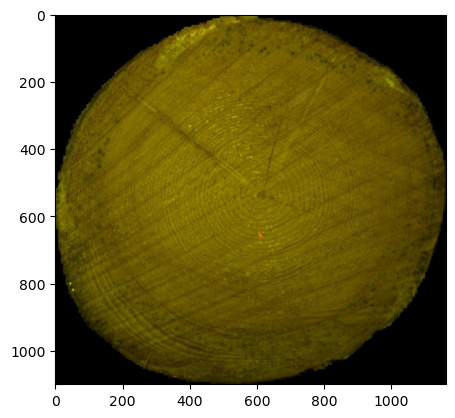

In [24]:
rand_nr = np.random.randint(1, nr_of_images-1, size = 1)[0]
plt.imshow(images[rand_nr])
plt.show()

Let us create grayscale copies of the images (we store them in a separate folder):

In [25]:
if os.path.exists('grayscale_images') == False:
    os.makedirs('grayscale_images')
grayscale_images_dir = 'grayscale_images'

In [26]:
grayscale_images = [] #store the images here!
for image_name in os.listdir(data_dir):
    image = plt.imread(os.path.join(data_dir, image_name))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = Image.fromarray(gray_image)
    gray_image.save(os.path.join(grayscale_images_dir, image_name))
    gray_image = np.array(gray_image) #convert back to array
    grayscale_images.append(gray_image)

Display a random grayscale image:

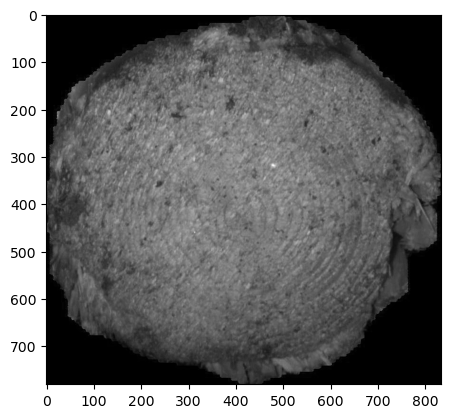

In [27]:
rand_nr = np.random.randint(1, nr_of_images-1, size = 1)[0]
plt.imshow(grayscale_images[rand_nr], cmap = 'gray')
plt.show()

### Obtaining a radial grayscale change from pith to bark

First of all, we make a prediction on pith location to estimate the location. We use a pre-trained model for esimating pith location. The model is trained on 68 images using transfer learning, for a total number of 50 epochs.

In [28]:
model = tf.keras.models.load_model('PithDetector')

Making a prediction for pith location of a random image:

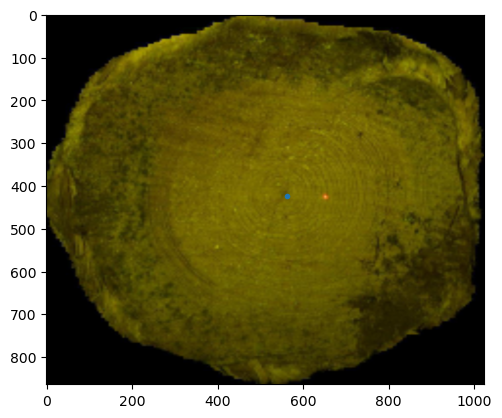

In [61]:
rand_nr = np.random.randint(0, nr_of_images-1, size = 1)[0]
image = images[rand_nr]
height, width = image.shape[0], image.shape[1]
image = cv2.resize(image, (224,224))
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)[0]
image = np.squeeze(image, axis = 0)
image = cv2.resize(image, (width, height))
plt.imshow(image)
plt.plot(prediction[0]*width, prediction[1]*height, '.')
plt.show()

Finding the contours of the log:

In [62]:
gray_image = grayscale_images[rand_nr]
ret, thresh = cv2.threshold(gray_image, 1, 255, 1)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

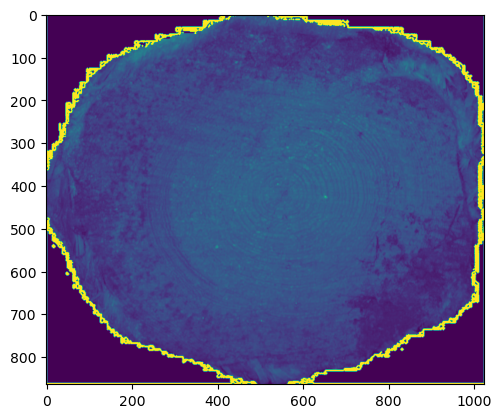

In [63]:
contoursImage = cv2.drawContours(gray_image, contours, -1, 255, 3)
plt.imshow(contoursImage)
plt.show()

Select a random point along the contour:

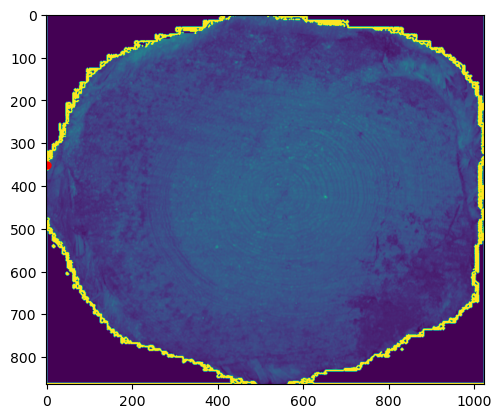

In [78]:
contours_array = []
for i in range(len(contours)):
    for j in range(len(contours[i])):
        contours_array.append(contours[i][j][0])

random_nr = np.random.randint(0, len(contours_array)-1, size = 1)[0]
random_point_on_contour = contours_array[random_nr]
plt.imshow(gray_image)
plt.plot(random_point_on_contour[0], random_point_on_contour[1], '.', color = 'r', markersize = 10)
plt.show()

Draw line between point and estimated pith location:

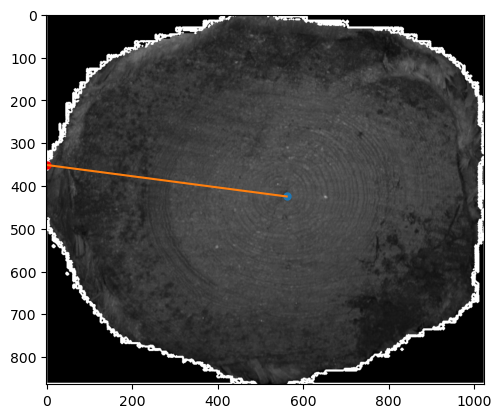

In [79]:
plt.imshow(gray_image, cmap = 'gray')
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.plot(random_point_on_contour[0], random_point_on_contour[1], '.', color = 'r', markersize = 10)
plt.plot(np.array([random_point_on_contour[0], prediction[0]*width]), np.array([random_point_on_contour[1], prediction[1]*height]))
plt.show()

Obtaining grayscale changes along line (here done by taking a fixed number of points along the line):

In [73]:
line = np.linspace(np.array([prediction[0]*width, prediction[1]*height]), random_point_on_contour, 100) # I choose 100 points

In [74]:
#we convert to integer numbers
for i in range(len(line)):
    for j in range(2):
        line[i,j] = int(line[i,j])
        
line = line.astype('int') #we do this for proper indexing

Make sure that we are actually along the line (or close to)

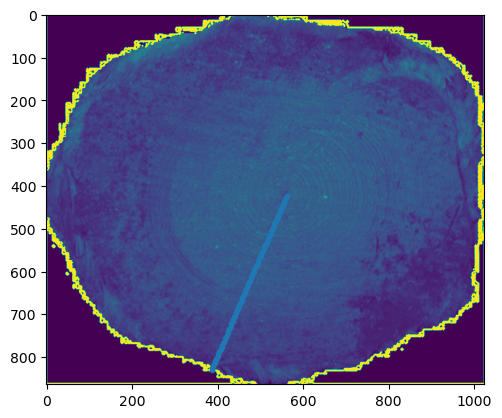

In [75]:
plt.imshow(gray_image)
plt.plot(line[:,0], line[:,1], '.')
plt.show()

Now let us look at grayscale in this direction:

In [76]:
pixel_values = []
i = 1
while i < len(line):
    value = gray_image[line[i][0], line[i][1]] 
    pixel_values.append(value)
    i += 1

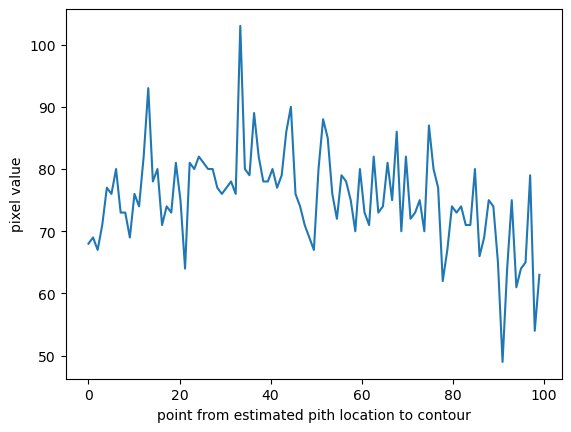

In [77]:
plt.plot(np.linspace(0,99,99), pixel_values)
plt.xlabel('point from estimated pith location to contour')
plt.ylabel('pixel value')
plt.show()